Actividad Semana 7
Jesus Israel Colmeneros Castañeda
A01361766

In [145]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import numpy as np

1.- Descarga los datosEnlaces a un sitio externo. y carga el dataset en tu libreta. Descripción aquí. 

In [146]:
#descargamos la DB
path=r"https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"
df_org=pd.read_csv(path)
df=df_org.copy()



2.-Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [147]:
df.head()

ID      X1   X2   X3   X4    X5   X6   X7   X8   X9  ...      X15      X16  \
0   1   20000  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0  ...      0.0      0.0   
1   2  120000  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  ...   3272.0   3455.0   
2   3   90000  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  ...  14331.0  14948.0   
3   4   50000  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  ...  28314.0  28959.0   
4   5   50000  1.0  2.0  1.0  57.0 -1.0  0.0 -1.0  0.0  ...  20940.0  19146.0   

       X17     X18      X19      X20     X21     X22     X23    Y  
0      0.0     0.0    689.0      0.0     0.0     0.0     0.0  1.0  
1   3261.0     0.0   1000.0   1000.0  1000.0     0.0  2000.0  1.0  
2  15549.0  1518.0   1500.0   1000.0  1000.0  1000.0  5000.0  0.0  
3  29547.0  2000.0   2019.0   1200.0  1100.0  1069.0  1000.0  0.0  
4  19131.0  2000.0  36681.0  10000.0  9000.0   689.0   679.0  0.0  

[5 rows x 25 columns]

In [148]:
df.columns

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [149]:
df.shape

(30000, 25)

In [150]:
df.dtypes

ID       int64
X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      29999 non-null  float64
 3   X3      29998 non-null  float64
 4   X4      29998 non-null  float64
 5   X5      29995 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29995 non-null  float64
 8   X8      29993 non-null  float64
 9   X9      29991 non-null  float64
 10  X10     29984 non-null  float64
 11  X11     29986 non-null  float64
 12  X12     29989 non-null  float64
 13  X13     29989 non-null  float64
 14  X14     29987 non-null  float64
 15  X15     29985 non-null  float64
 16  X16     29983 non-null  float64
 17  X17     29990 non-null  float64
 18  X18     29992 non-null  float64
 19  X19     29991 non-null  float64
 20  X20     29992 non-null  float64
 21  X21     29989 non-null  float64
 22

In [152]:
print(df.isna())

          ID     X1     X2     X3     X4     X5     X6     X7     X8     X9  \
0      False  False  False  False  False  False  False  False  False  False   
1      False  False  False  False  False  False  False  False  False  False   
2      False  False  False  False  False  False  False  False  False  False   
3      False  False  False  False  False  False  False  False  False  False   
4      False  False  False  False  False  False  False  False  False  False   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
29995  False  False  False  False  False  False  False  False  False  False   
29996  False  False  False  False  False  False  False  False  False  False   
29997  False  False  False  False  False  False  False  False  False  False   
29998  False  False  False  False  False  False  False  False  False  False   
29999  False  False  False  False  False  False  False  False  False  False   

       ...    X15    X16    X17    X18    X19    X2

3.-Limpia los datos eliminando los registros nulos o rellena con la media de la columna

In [153]:
#Haremos imputacion de los NAs con la media en todas las columnas
df=df.fillna(df.mean())
df.shape



(30000, 25)

4.-Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [154]:
df.describe()

ID              X1            X2            X3            X4  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603753      1.853057      1.551903   
std     8660.398374   129747.661567      0.489117      0.790293      0.521950   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                 X5            X6            X7            X8            X9  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.484214     -0.016635     -0.133689     -0.166405     -0.220800   
std        9.217256      1.123773      1.197154      1.195908      1.168977   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...            X15            X16            X17            X18  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43275.652326   40324.493980   38881.135745    5662.945886   
std    ...   64329.411150   60792.752471   59551.384923   16561.956313   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2332.000000    1769.500000    1258.500000    1000.000000   
50%    ...   19066.000000   18123.000000   17100.500000    2100.000000   
75%    ...   54506.000000   50177.000000   49198.250000    5007.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

                X19            X20            X21            X22  \
count  3.000000e+04   30000.000000   30000.000000   30000.000000   
mean   5.922489e+03    5225.623400    4827.252526    4800.297209   
std    2.304072e+04   17606.074601   15665.879011   15278.040231   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    8.360000e+02     390.000000     298.000000     254.750000   
50%    2.010000e+03    1800.000000    1500.000000    1500.000000   
75%    5.000000e+03    4512.000000    4016.500000    4043.750000   
max    1.684259e+06  896040.000000  621000.000000  426529.000000   

                 X23             Y  
count   30000.000000  30000.000000  
mean     5216.259977      0.221189  
std     17777.366677      0.415034  
min         0.000000      0.000000  
25%       118.000000      0.000000  
50%      1500.000000      0.000000  
75%      4000.000000      0.000000  
max    528666.000000      1.000000  

[8 rows x 25 columns]

5.-Realiza el conteo de las variables categóricas

In [155]:
#Gracias a la descripcion de la data detectamos las siguientes variables categoricas
cat_var={"X2","X3","X4"}
len(cat_var)

3

6.-Escala los datos, si consideras necesario

In [156]:
#Se realizara un pipile con las transformaciones de las variables numericas y categoricas
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import FunctionTransformer, PowerTransformer
df.drop('ID', inplace=True, axis=1)
df.drop('Y', inplace=True, axis=1)
df_num=['X1','X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23']
df_cat=["X2","X3","X4"]
#Para las variables numericas se usara una transformacion MinMax
df_num_pip=Pipeline(steps=[("scalar",MinMaxScaler(feature_range=(1,2)))])
df_num_pip_name=df_num
#Para las variables categoricas se usara OneHot
df_cat_pip=Pipeline(steps=[("OneHotE",OneHotEncoder(handle_unknown="ignore"))])
df_cat_pip_name=df_cat

Col_Trans=ColumnTransformer(transformers=[("numericas",df_num_pip,df_num_pip_name),
                                          ("categoricas",df_cat_pip,df_cat_pip_name)],
                                          remainder="passthrough")
X_fit = Col_Trans.fit(df)
df_tran=pd.DataFrame(X_fit.transform(df))
#df_tran.drop('ID', inplace=True, axis=1)
df_tran

0         1    2    3    4    5    6    7         8         9   \
0      1.010101  1.051724  1.4  1.4  1.1  1.1  1.0  1.0  1.149982  1.069164   
1      1.111111  1.086207  1.1  1.4  1.2  1.2  1.2  1.4  1.148892  1.067858   
2      1.080808  1.224138  1.2  1.2  1.2  1.2  1.2  1.2  1.172392  1.079532   
3      1.040404  1.275862  1.2  1.2  1.2  1.2  1.2  1.2  1.188100  1.111995   
4      1.040404  1.620690  1.1  1.2  1.1  1.2  1.2  1.2  1.154144  1.071601   
...         ...       ...  ...  ...  ...  ...  ...  ...       ...       ...   
29995  1.212121  1.310345  1.2  1.2  1.2  1.2  1.2  1.2  1.313716  1.249208   
29996  1.141414  1.379310  1.1  1.1  1.1  1.1  1.2  1.2  1.148008  1.067955   
29997  1.020202  1.275862  1.6  1.5  1.4  1.1  1.2  1.2  1.149674  1.069405   
29998  1.070707  1.344828  1.3  1.1  1.2  1.2  1.2  1.1  1.145064  1.140604   
29999  1.040404  1.431034  1.2  1.2  1.2  1.2  1.2  1.2  1.188931  1.112633   

       ...   26   27   28   29   30   31   32   33   34   35  
0      ...  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
1      ...  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
2      ...  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
3      ...  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
4      ...  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
29995  ...  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
29996  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
29997  ...  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
29998  ...  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
29999  ...  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  

[30000 rows x 36 columns]

7.-Reduce las dimensiones con PCA, si consideras necesario.
    
    Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%
    
    Indica la importancia de las variables en cada componente

In [157]:
#Con la funcion PCA() se implementara la transformacion de la data para identificar las variables mas importantes
from sklearn.decomposition import PCA
pcs = PCA()
pcs_t = pcs.fit_transform(df_tran)
pcs_t

array([[-1.03832375e+00, -2.67836903e-01, -3.11930081e-01, ...,
        -2.25929809e-15,  2.01323096e-15, -4.32538524e-17],
       [ 1.72064757e-01, -6.98102813e-01, -8.34412604e-01, ...,
        -6.65854302e-16, -2.41506468e-15, -7.15045782e-17],
       [ 1.60750504e-01, -6.93150495e-01, -8.18608083e-01, ...,
        -6.61499173e-16, -2.35244721e-16, -1.00992823e-17],
       ...,
       [ 6.09625833e-01,  6.55650372e-01, -9.19609091e-01, ...,
        -1.41258401e-16, -5.51801650e-17,  1.35739043e-18],
       [-4.42140060e-01,  1.09301395e+00,  4.69287871e-01, ...,
        -5.68156079e-17,  2.86707744e-18, -1.22468895e-18],
       [-6.15023676e-01,  1.09133948e+00, -3.71108849e-01, ...,
         1.78476747e-16, -7.38900065e-17,  9.33029304e-20]])

In [158]:
#Para facilitar la letura de la data usamos un for para crear los nombres de los componentes creados por PCA
pcs_labels = [f'PC_{i + 1}' for i in range(len(df_tran.columns))]
pcsSummary_df = pd.DataFrame({
'% varianza explicada': np.round(pcs.explained_variance_ratio_,4) * 100,
'% varianza acumulada': np.cumsum(pcs.explained_variance_ratio_) * 100
})

pcsSummary_df.index = pcs_labels
print(pcsSummary_df)

print('\n')

# Comprobando que los PCA convierta la infroamción de las orignales
pcs_df = pd.DataFrame(pcs_t, columns =pcs_labels)
print("Varianza total variables originales: ", df_tran.var().sum())
print("Varianza total de los componentes: ", pcs_df.var().sum())

       % varianza explicada  % varianza acumulada
PC_1                  29.97             29.965043
PC_2                  26.84             56.805765
PC_3                  21.98             78.787001
PC_4                  11.30             90.091347
PC_5                   3.31             93.402808
PC_6                   1.33             94.732612
PC_7                   1.04             95.773784
PC_8                   0.86             96.632196
PC_9                   0.74             97.368822
PC_10                  0.53             97.898824
PC_11                  0.45             98.353781
PC_12                  0.31             98.662765
PC_13                  0.28             98.945108
PC_14                  0.21             99.150688
PC_15                  0.15             99.303242
PC_16                  0.13             99.435803
PC_17                  0.11             99.548328
PC_18                  0.10             99.650930
PC_19                  0.08             99.727054


In [159]:
# Si usamos las variables originales para identificar la varianza tendriamos que usar gran parte de ellas

total_var = df_tran.var().sum()
df_varianza = pd.DataFrame({
"Porcentaje Varianza": (df_tran.var()/ total_var) * 100,
"Porcentaje Varianza Acumulado": (df_tran.var().cumsum() / total_var) *100
})

print(df_varianza)
### se hubiera tenido que usar casi todas para lograr el 99% de información, en lugar de 10

    Porcentaje Varianza  Porcentaje Varianza Acumulado
0              0.973191                       0.973191
1              1.430925                       2.404116
2              0.715528                       3.119644
3              0.812026                       3.931670
4              0.810336                       4.742006
5              0.774251                       5.516257
6              0.727319                       6.243576
7              0.749141                       6.992717
8              0.240532                       7.233248
9              0.258480                       7.491729
10             0.082134                       7.573862
11             0.208055                       7.781917
12             0.205881                       7.987799
13             0.118664                       8.106463
14             0.020366                       8.126830
15             0.010603                       8.137433
16             0.021875                       8.159308
17        

In [160]:
#Podemos crear una matriz para entender de que variables se compone cada conjunto de PCA
comps_df = abs(pd.DataFrame(
pcs.components_.round(4),
columns = pcs_df.columns, 
index = df_tran.columns))

print(comps_df.iloc[:,:10])

      PC_1    PC_2    PC_3    PC_4    PC_5    PC_6    PC_7    PC_8    PC_9  \
0   0.0019  0.0847  0.0026  0.0027  0.0015  0.0014  0.0003  0.0006  0.0018   
1   0.0027  0.0583  0.0112  0.0143  0.0130  0.0117  0.0100  0.0083  0.0043   
2   0.0529  0.0556  0.0270  0.0350  0.0341  0.0321  0.0295  0.0278  0.0027   
3   0.0654  0.0460  0.0278  0.0337  0.0335  0.0314  0.0278  0.0249  0.0025   
4   0.1513  0.0583  0.3231  0.4033  0.4193  0.4169  0.3985  0.3837  0.0820   
5   0.5961  0.4380  0.0357  0.0221  0.0137  0.0050  0.0214  0.0324  0.3039   
6   0.2123  0.7142  0.0340  0.0251  0.0299  0.0270  0.0140  0.0142  0.1283   
7   0.1056  0.5106  0.0271  0.0319  0.0299  0.0265  0.0205  0.0117  0.1115   
8   0.1068  0.1138  0.0215  0.0123  0.0030  0.0014  0.0009  0.0140  0.0028   
9   0.2318  0.0277  0.5395  0.3744  0.0622  0.2673  0.4032  0.4381  0.1661   
10  0.6948  0.0643  0.2763  0.2484  0.1817  0.0494  0.0560  0.1332  0.2483   
11  0.0442  0.0052  0.6417  0.2517  0.5621  0.1704  0.1852  0.37

In [161]:
# Las variables mas importantes son:
print(comps_df.iloc[:,:10].idxmax().sort_values())

PC_2      6
PC_1     10
PC_3     11
PC_4     13
PC_6     13
PC_8     13
PC_5     14
PC_7     17
PC_9     28
PC_10    28
dtype: int64


In [162]:
# Las variables menos importantes son:
print(comps_df.iloc[:,:10].idxmin().sort_values())

PC_2     23
PC_4     26
PC_3     30
PC_5     31
PC_6     31
PC_7     31
PC_8     31
PC_1     32
PC_9     32
PC_10    32
dtype: int64


8.-Elabora los histogramas de los atributos para visualizar su distribución


C:\Users\israc\AppData\Local\Temp\ipykernel_34108\2798511604.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(6, 7 , i + 1)


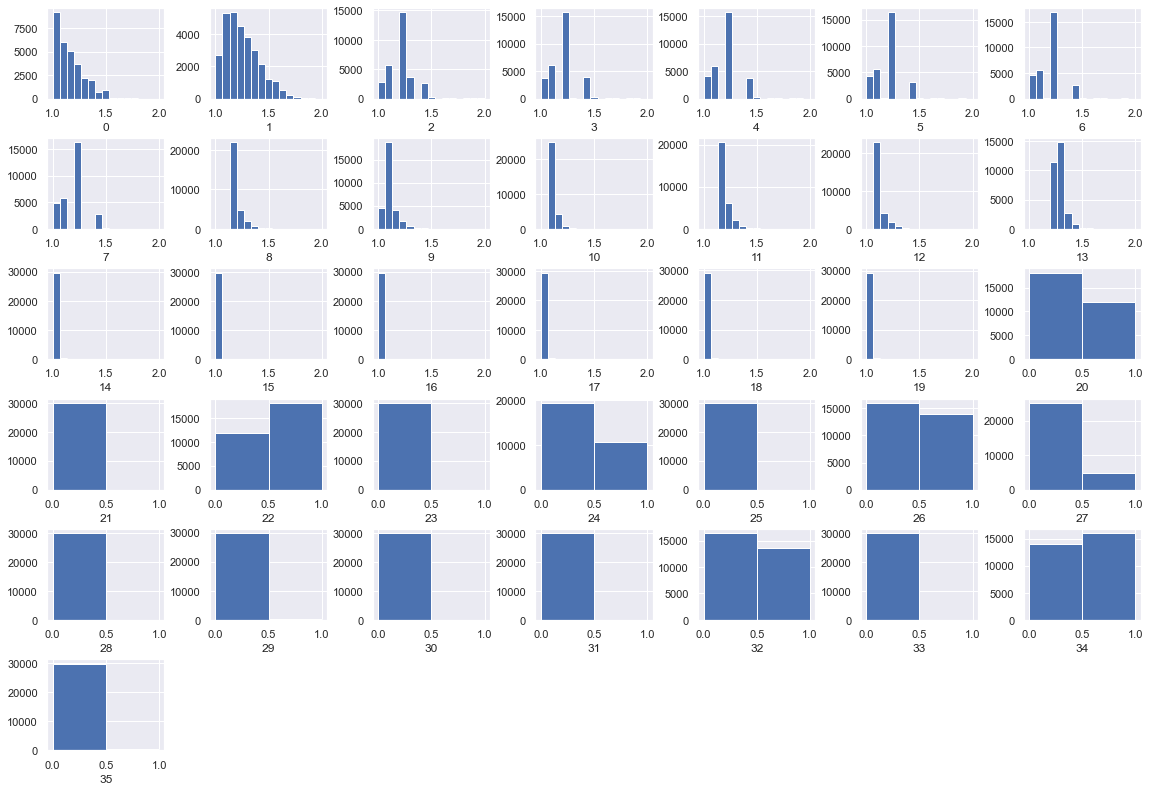

In [163]:
import seaborn as sns 
import matplotlib.pyplot as plt 
# histograma de cada variable X
sns.set(rc={"figure.figsize":(16,11)})
fig, axes = plt.subplots(3,7)
fig.tight_layout(h_pad=5)

for i in range(0,36):
    plt.subplot(6, 7 , i + 1)
    b = df_tran.iloc[:,i].nunique()
    if b > 10:
        b = 15
    df_tran.iloc[:,i].hist(bins=b)
    plt.xlabel(df_tran.columns[i])

plt.show()

9.-Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

In [172]:
import plotly.express as px
components = pcs.fit_transform(df_tran)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pcs.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color=df["X10"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [173]:
pca = PCA(n_components=2)
components = pca.fit_transform(df_tran)

fig = px.scatter(components, x=0, y=1, color=df['X10'])
fig.show()

In [175]:
pca = PCA()
pca.fit(df_tran)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

10.-Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.

La ultima grafica indica la explicacion de la varianza acumulada en los componentes, donde observamos que del 1 al 5 tiene un crecimiento importante y a partir de ahi casi no incrementa. Esto nos ayuda a entender que tan importantes son los primeros componentes de PCA.